### 6. SED fitting to spatial bins

In this step, we will perform SED fitting to each spatial bin in the binned spectrophotometric data cube we produced in the previous Step. This SED fitting can be performed using functions in the `piXedfit_fitting` module. We will also learn how to check fitting results using visualization features provided in the `piXedfit_analysis` module.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

### 6.1. Perform SED fitting to all spatial bins

There are several SED fitting functions in the `piXedfit_fitting` module depending on the type of data we have. If we have a single SED or a collection of them, but we want to fit the SEDs one by one, we can use `singleSEDfit` function (for photometric SED) or `singleSEDfit_specphoto` (for spectrophotometric SED). If we have a 3D data cube obtained after image processing and pixel binning, we can use `SEDfit_from_binmap` (for photometric data cube) or `SEDfit_from_binmap_specphoto` (for spectrphotmetric data cube). In case we want to fit individual pixels in the galaxy, we can use `SEDfit_pixels_from_fluxmap` function. Please refer to the API references [here](https://pixedfit.readthedocs.io/en/latest/piXedfit_fitting.html) for more information about these functions.
    
Since we have a spectrophotometric data cube in this tutorial, we will use `SEDfit_from_binmap_specphoto` for fitting the SEDs of individual spatial bins. An example of script for doing this SED fitting is given below. In this script, `binid_range` determines the spatial bins that are going to be fit. With this, we can separate calculations into multiple terminals (i.e., processes) on a multi cores cluster or super computer.  

    
The `models_spec` is a HDF5 file containing a set of model spectra at rest-frame that is generated using `piXedfit.piXedfit_model.save_models_rest_spec` function. Please refer to [another tutorial](https://github.com/aabdurrouf/piXedfit/blob/main/examples/Generating_models.ipynb) for an example of script for generating the model spectra at rest-frame.

Priors for parameters can be defined using `priors` class (see the API reference [here](https://pixedfit.readthedocs.io/en/latest/piXedfit_fitting.html#piXedfit.piXedfit_fitting.priors)). First, we define ranges of values for some parameters (no need to define it for all the free parameters). Then, we can choose the form for the priors.

In [ ]:
# Script 1
from piXedfit.piXedfit_fitting import SEDfit_from_binmap_specphoto

fits_binmap = "pixbin_corr_specphoto_fluxmap_ngc309.fits"
binid_range = [0,10]
models_spec = "model_rest_spec.hdf5"     # set of model rest-frame spectra  

# define priors using function priors
from piXedfit.piXedfit_fitting import priors

# define range of values for some parameters   
ranges = {'logzsol':[-2.0,0.2], 'dust1':[0.0,3.0], 'dust2':[0.0,3.0], 'log_age':[-3.0,1.14]}
pr = priors(ranges)
params_ranges = pr.params_ranges()

# define the form of priors. 
prior1 = pr.uniform('logzsol')
prior2 = pr.uniform('dust1')
prior3 = pr.uniform('dust2')
prior4 = pr.uniform('log_age')
params_priors = [prior1, prior2, prior3, prior4]

fit_method = 'mcmc'

SEDfit_from_binmap_specphoto(fits_binmap, binid_range=binid_range, models_spec=models_spec,
                             params_ranges=params_ranges, params_priors=params_priors,
                             fit_method=fit_method, spec_sigma=2.6, poly_order=10, nwalkers=100,
                             nsteps=700, nproc=10, initfit_nmodels_mcmc=50000, cosmo=0, H0=70.0, Om0=0.3,
                             store_full_samplers=1)

In [ ]:
# Script 2
from piXedfit.piXedfit_fitting import SEDfit_from_binmap_specphoto

fits_binmap = "pixbin_corr_specphoto_fluxmap_ngc309.fits"
binid_range = [10,20]
models_spec = "model_rest_spec.hdf5"     # set of model rest-frame spectra  

# define priors using function priors
from piXedfit.piXedfit_fitting import priors

# define range of values for some parameters   
ranges = {'logzsol':[-2.0,0.2], 'dust1':[0.0,3.0], 'dust2':[0.0,3.0], 'log_age':[-3.0,1.14]}
pr = priors(ranges)
params_ranges = pr.params_ranges()

# define the form of priors. 
prior1 = pr.uniform('logzsol')
prior2 = pr.uniform('dust1')
prior3 = pr.uniform('dust2')
prior4 = pr.uniform('log_age')
params_priors = [prior1, prior2, prior3, prior4]

fit_method = 'mcmc'

SEDfit_from_binmap_specphoto(fits_binmap, binid_range=binid_range, models_spec=models_spec,
                             params_ranges=params_ranges, params_priors=params_priors,
                             fit_method=fit_method, spec_sigma=2.6, poly_order=10, nwalkers=100,
                             nsteps=700, nproc=10, initfit_nmodels_mcmc=50000, cosmo=0, H0=70.0, Om0=0.3,
                             store_full_samplers=1)

In [ ]:
# Script 3
from piXedfit.piXedfit_fitting import SEDfit_from_binmap_specphoto

fits_binmap = "pixbin_corr_specphoto_fluxmap_ngc309.fits"
binid_range = [20,30]
models_spec = "model_rest_spec.hdf5"     # set of model rest-frame spectra  

# define priors using function priors
from piXedfit.piXedfit_fitting import priors

# define range of values for some parameters   
ranges = {'logzsol':[-2.0,0.2], 'dust1':[0.0,3.0], 'dust2':[0.0,3.0], 'log_age':[-3.0,1.14]}
pr = priors(ranges)
params_ranges = pr.params_ranges()

# define the form of priors. 
prior1 = pr.uniform('logzsol')
prior2 = pr.uniform('dust1')
prior3 = pr.uniform('dust2')
prior4 = pr.uniform('log_age')
params_priors = [prior1, prior2, prior3, prior4]

fit_method = 'mcmc'

SEDfit_from_binmap_specphoto(fits_binmap, binid_range=binid_range, models_spec=models_spec,
                             params_ranges=params_ranges, params_priors=params_priors,
                             fit_method=fit_method, spec_sigma=2.6, poly_order=10, nwalkers=100,
                             nsteps=700, nproc=10, initfit_nmodels_mcmc=50000, cosmo=0, H0=70.0, Om0=0.3,
                             store_full_samplers=1)

<font size="4"> We can continue making more scripts for fitting the rest of the spatial bins. This of course depend on the computational rescource we have. 

### 6.2. Check fiting results

To check SED fitting results, there are three kind of plots that can be made: (1) corner plot, which shows joint posterior distributions of the parameters, (2) SED plot, and (3) star formation history (SFH) plot. The plotting below only use default setting of each function, for more information on the features provided by each funtion, please see the API reference [here](https://pixedfit.readthedocs.io/en/latest/piXedfit_analysis.html).

In [2]:
from piXedfit.piXedfit_analysis import plot_corner
from piXedfit.piXedfit_analysis import plot_SED
from piXedfit.piXedfit_analysis import plot_sfh_mcmc

### Spatial bin 1

Plotting posteriors probability distributions
=> Number of parameters: 11


'corner_mcmc_bin1.png'

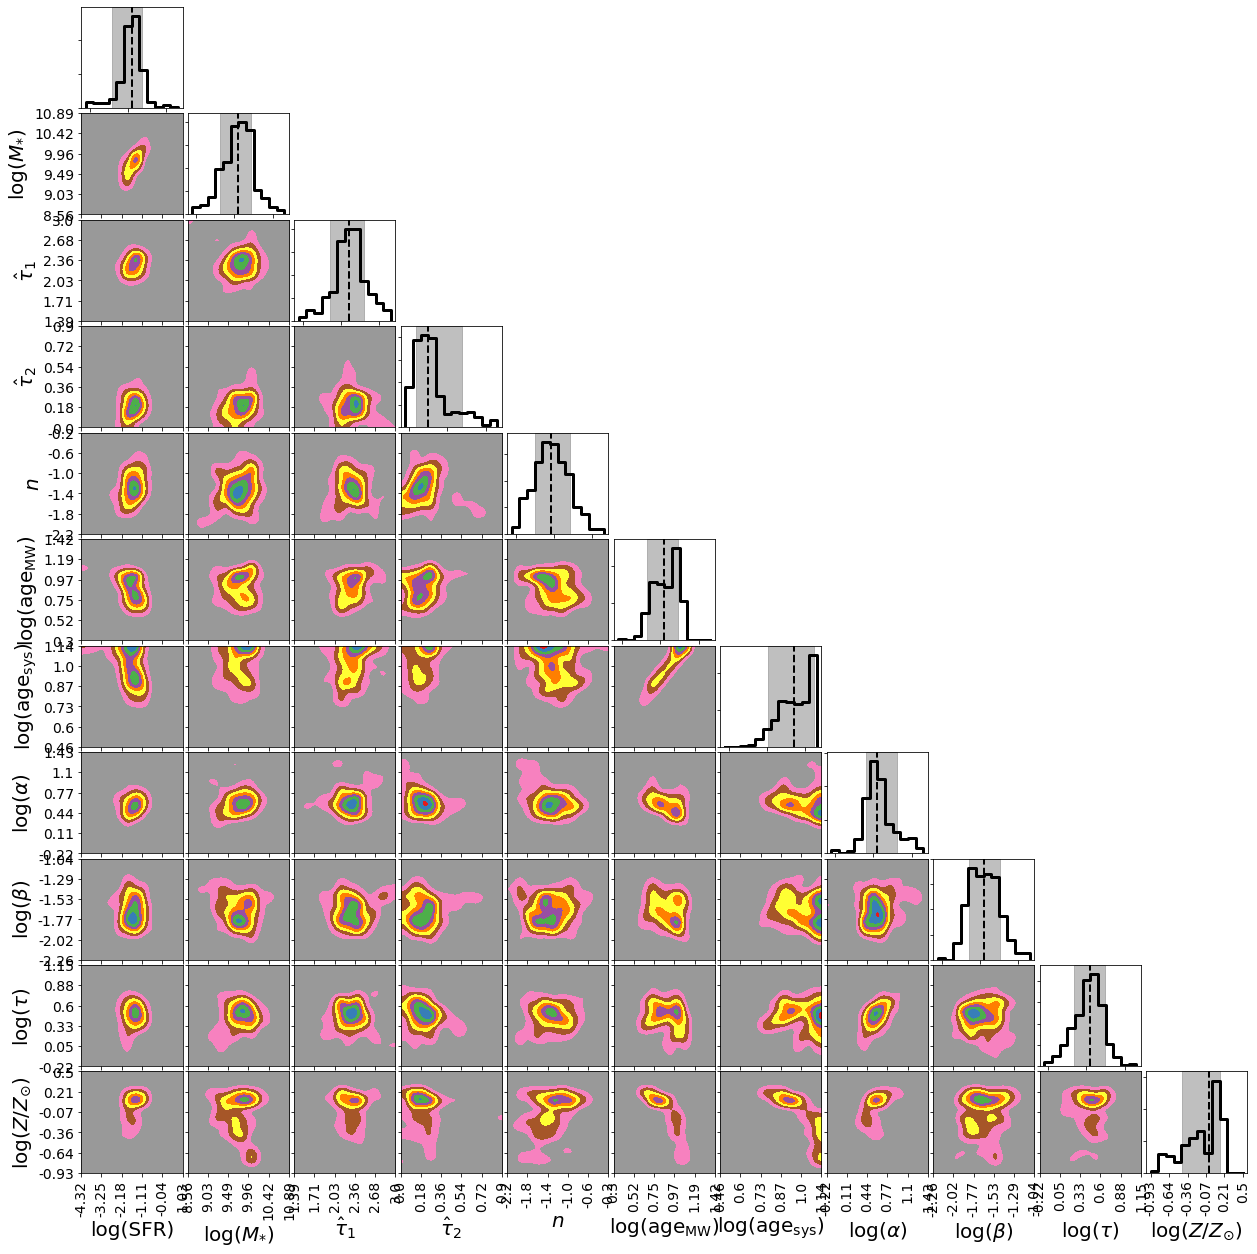

In [3]:
name_sampler_fits = "mcmc_bin1.fits"
plot_corner(name_sampler_fits)

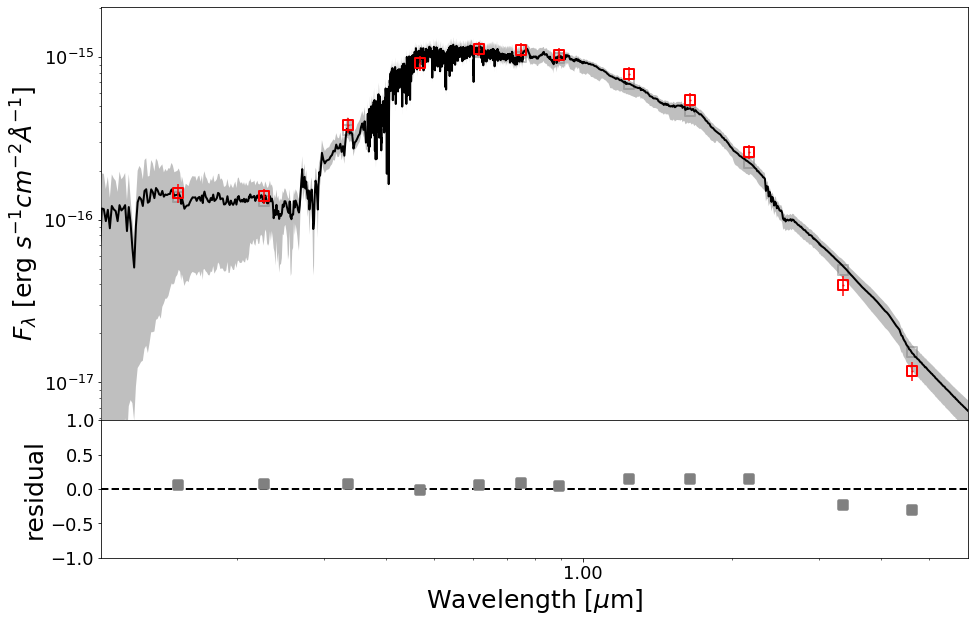

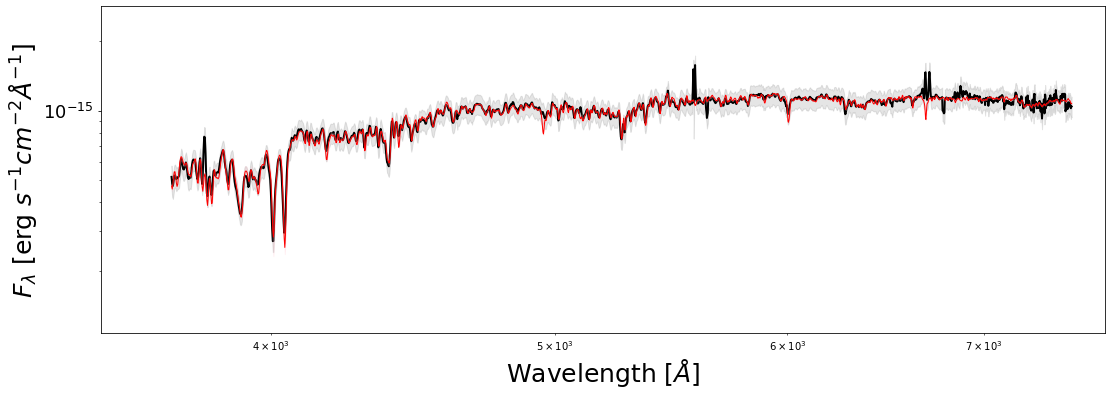

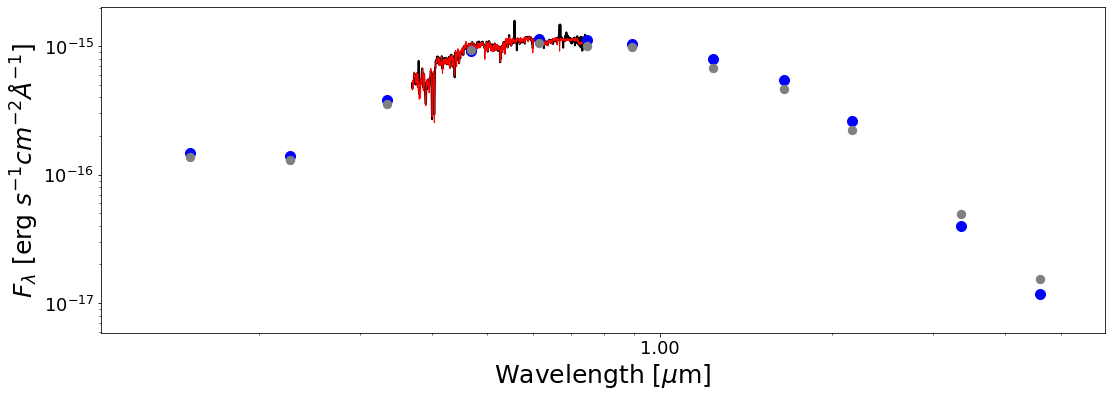

In [4]:
name_sampler_fits = "mcmc_bin1.fits"
plot_SED(name_sampler_fits, loc_legend=3, decompose=0)

### Spatial bin 5

Plotting posteriors probability distributions
=> Number of parameters: 11


'corner_mcmc_bin5.png'

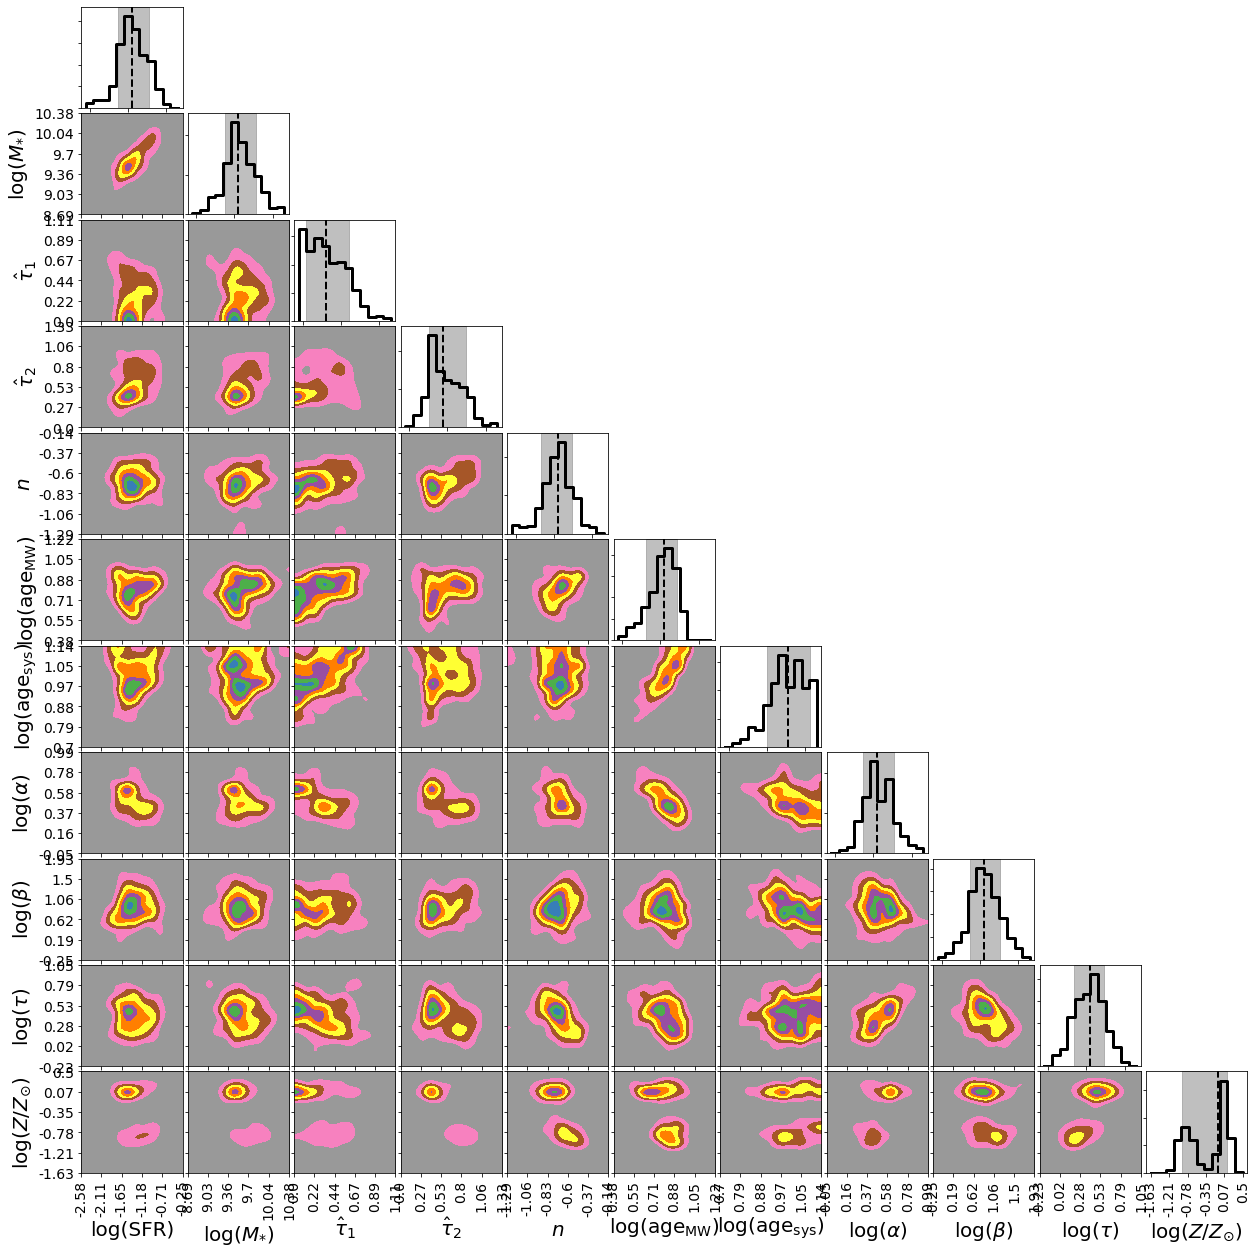

In [5]:
name_sampler_fits = "mcmc_bin5.fits"
plot_corner(name_sampler_fits)

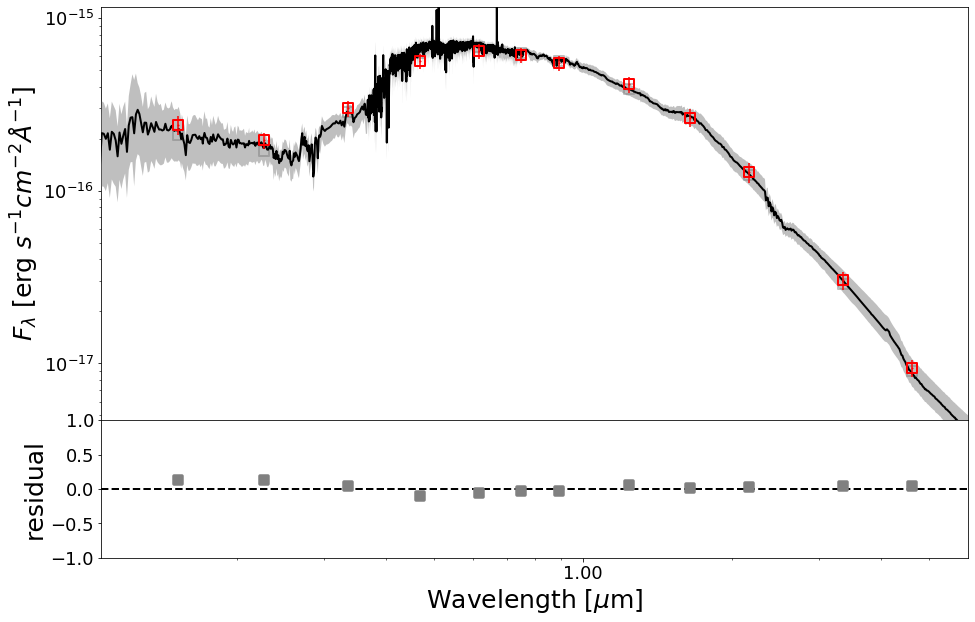

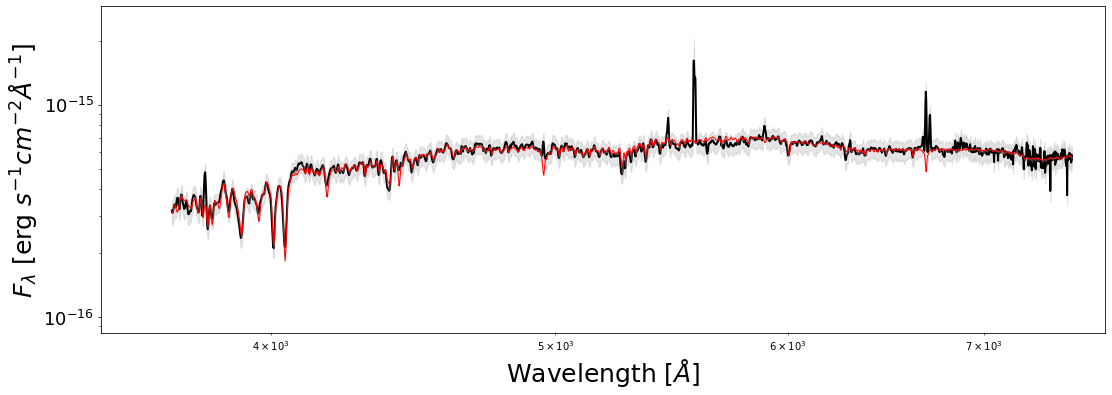

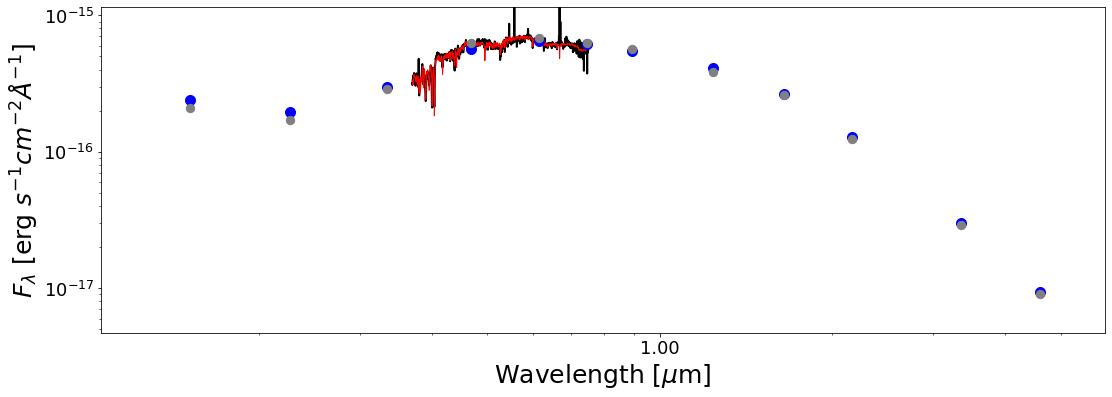

In [6]:
name_sampler_fits = "mcmc_bin5.fits"
plot_SED(name_sampler_fits, loc_legend=3, decompose=0)

### Spatial bin 9

Plotting posteriors probability distributions
=> Number of parameters: 11


'corner_mcmc_bin9.png'

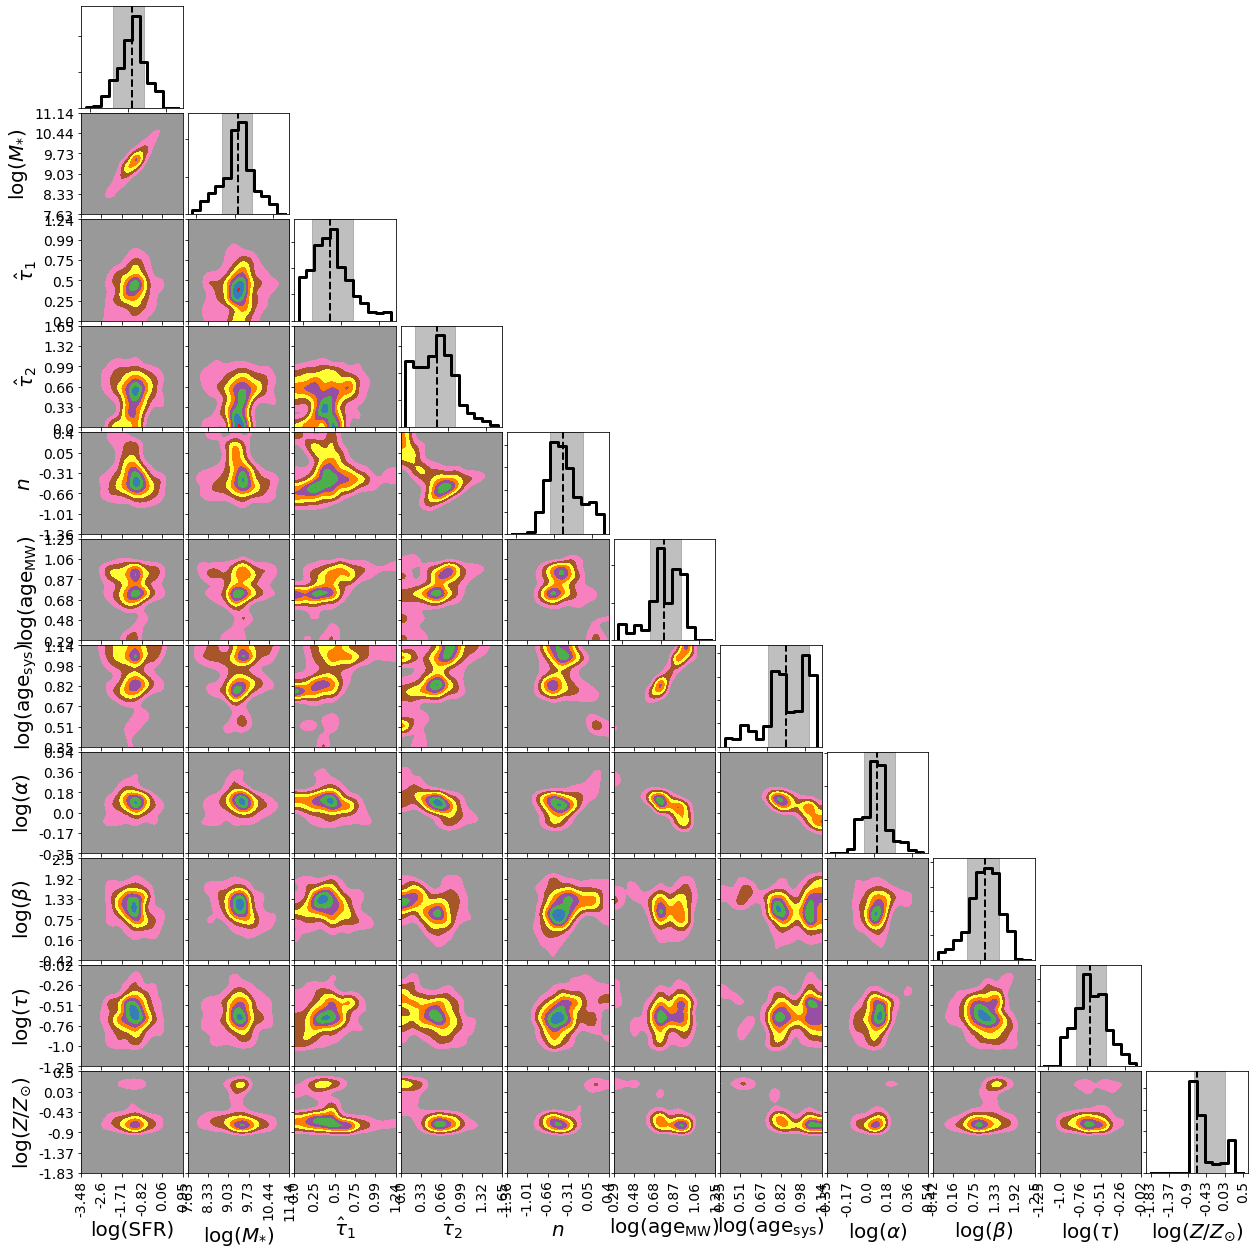

In [7]:
name_sampler_fits = "mcmc_bin9.fits"
plot_corner(name_sampler_fits)

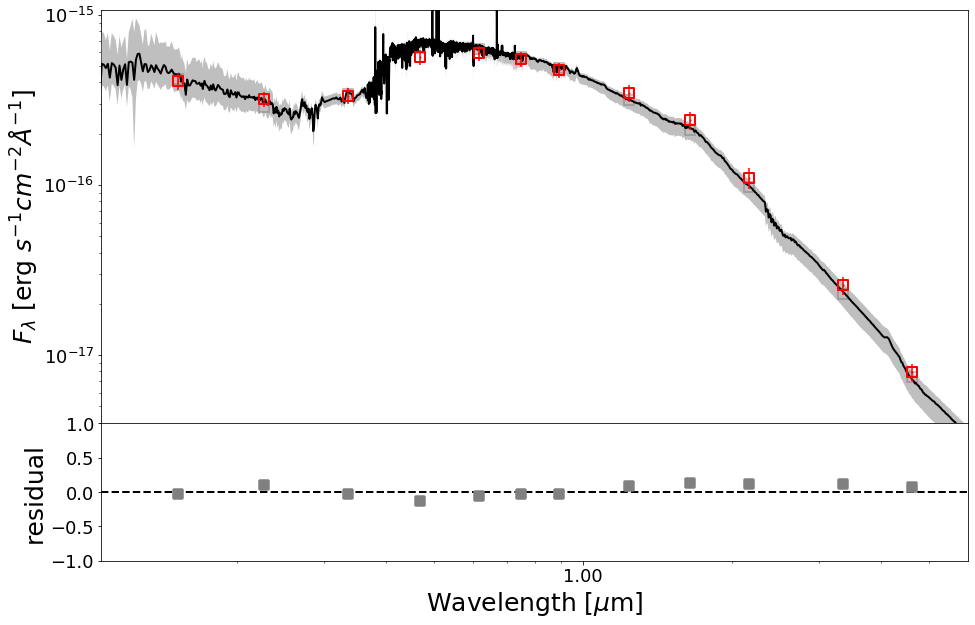

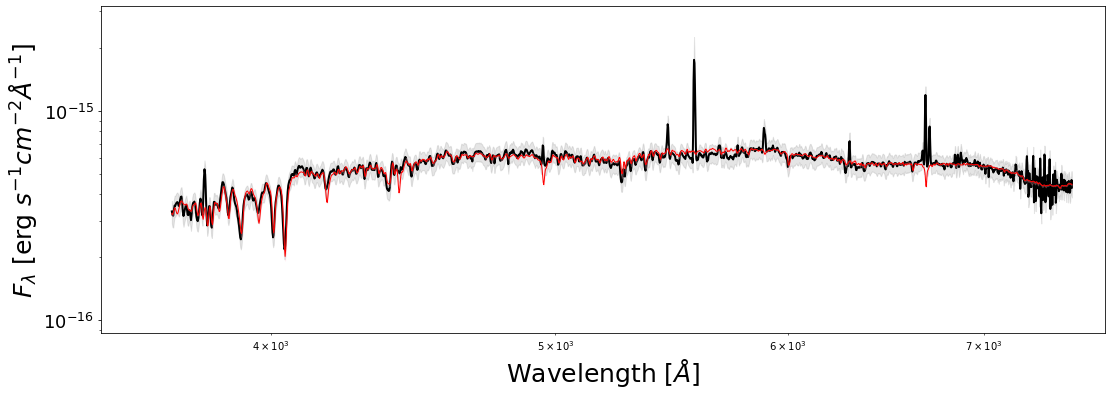

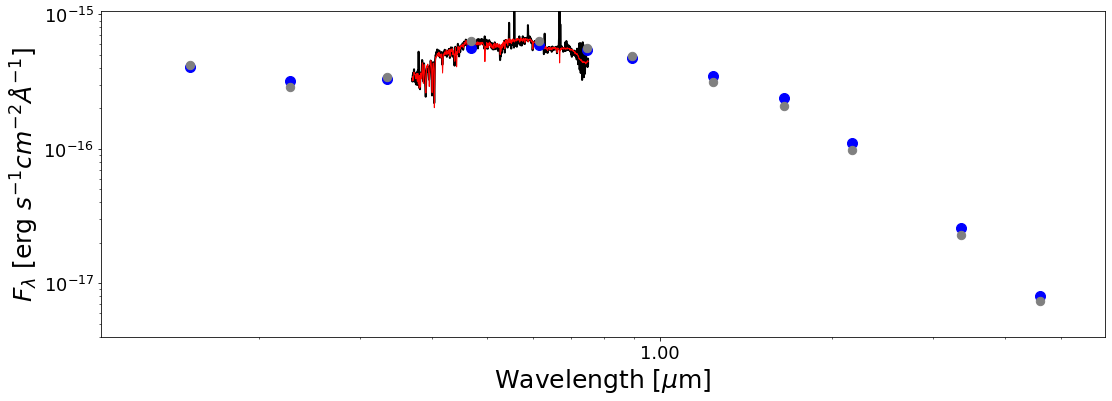

In [8]:
name_sampler_fits = "mcmc_bin9.fits"
plot_SED(name_sampler_fits, loc_legend=3, decompose=0)

### Spatial bin 17

Plotting posteriors probability distributions
=> Number of parameters: 11


'corner_mcmc_bin17.png'

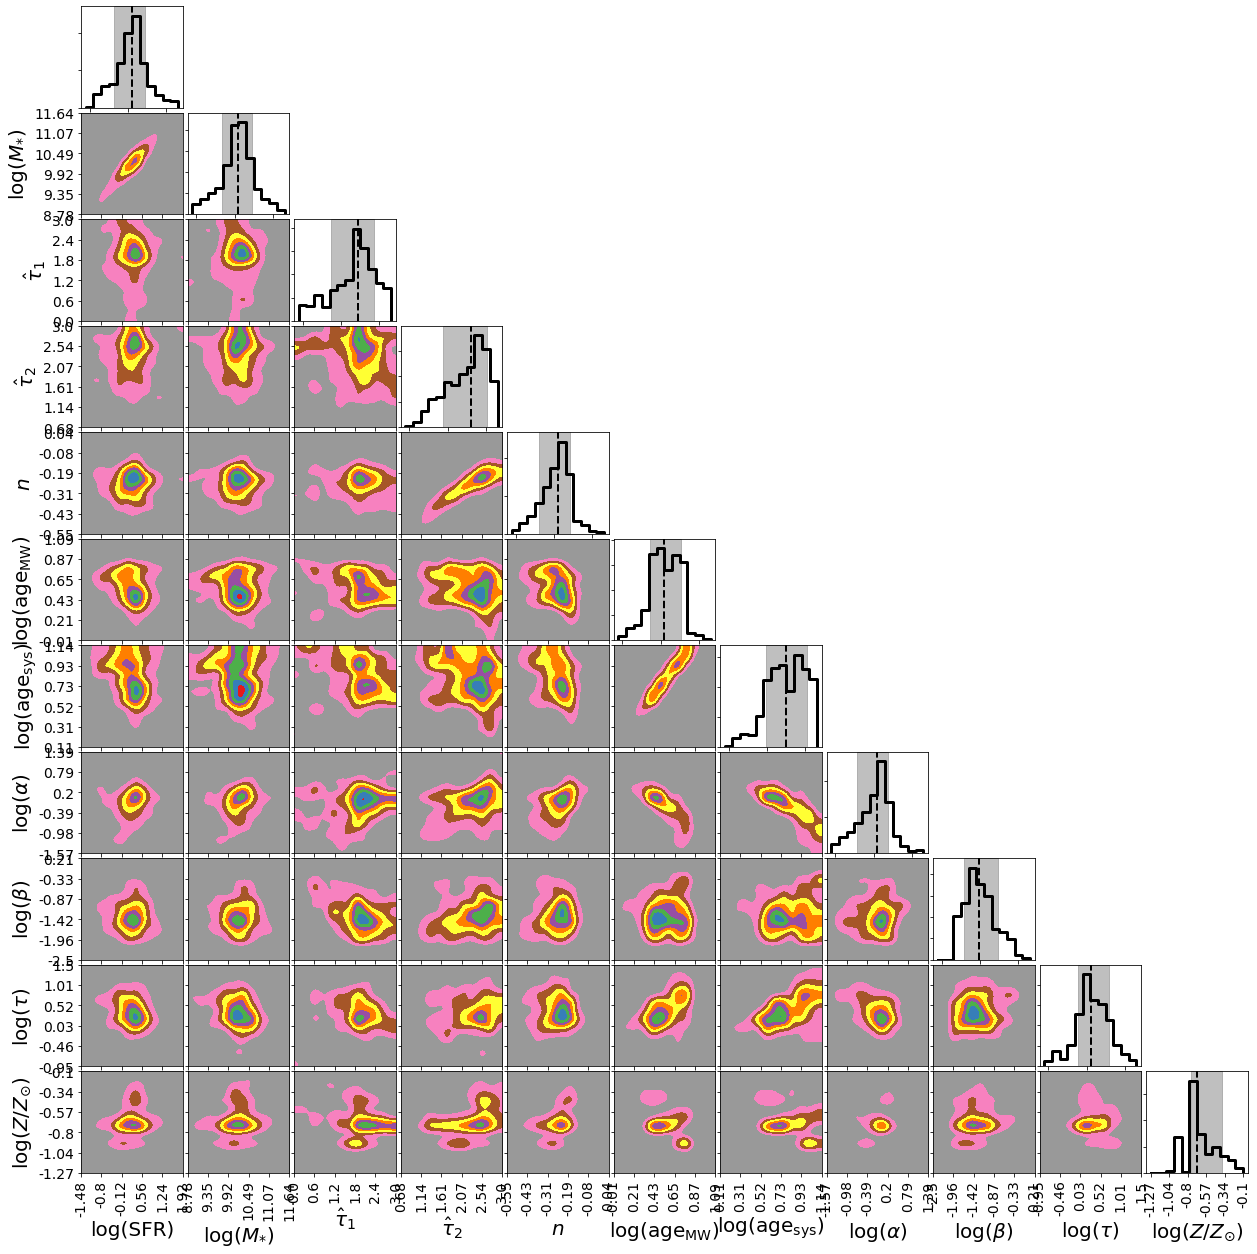

In [9]:
name_sampler_fits = "mcmc_bin17.fits"
plot_corner(name_sampler_fits)

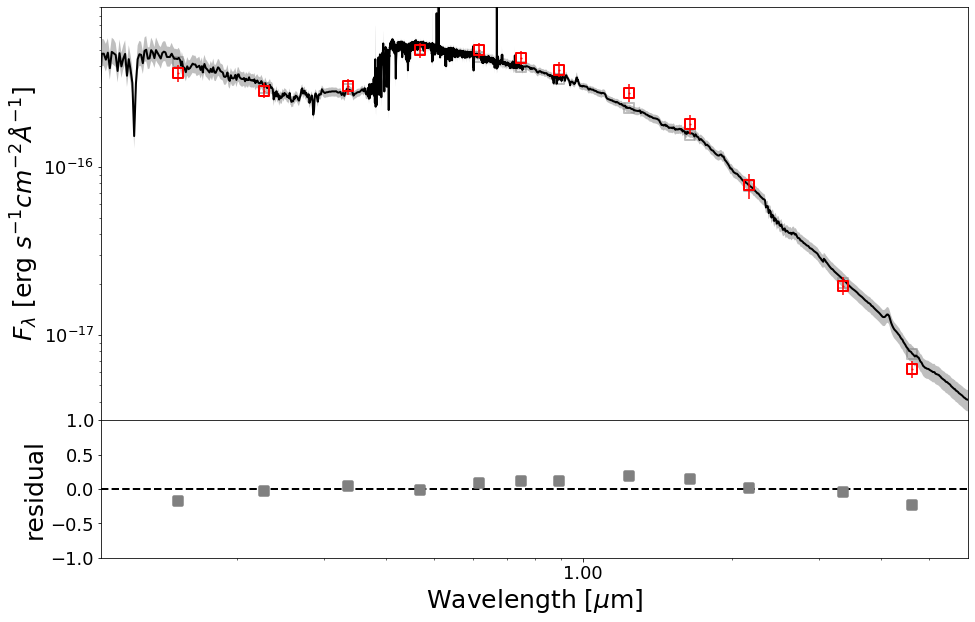

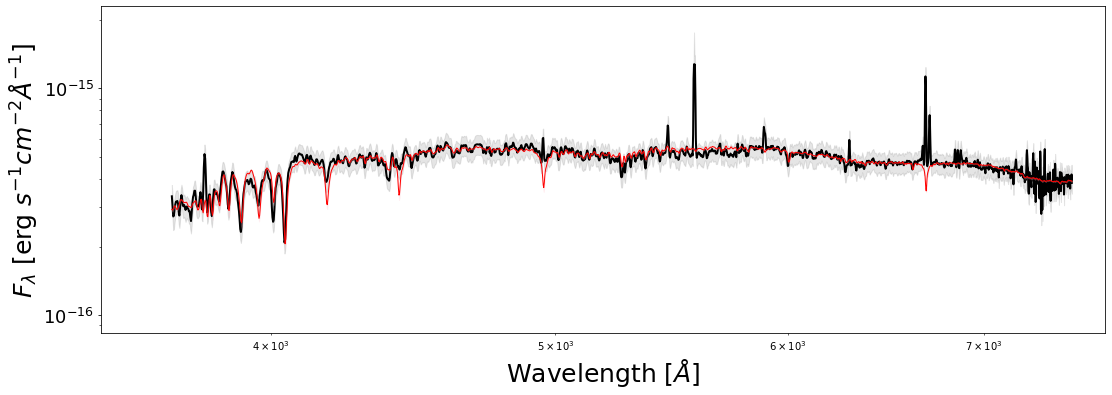

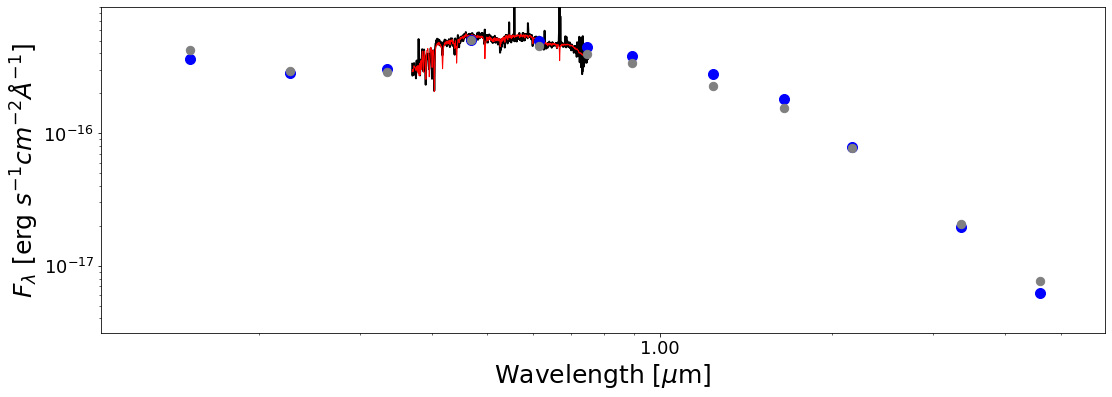

In [10]:
name_sampler_fits = "mcmc_bin17.fits"
plot_SED(name_sampler_fits, loc_legend=3, decompose=0)

### Spatial bin 43

Plotting posteriors probability distributions
=> Number of parameters: 11


'corner_mcmc_bin43.png'

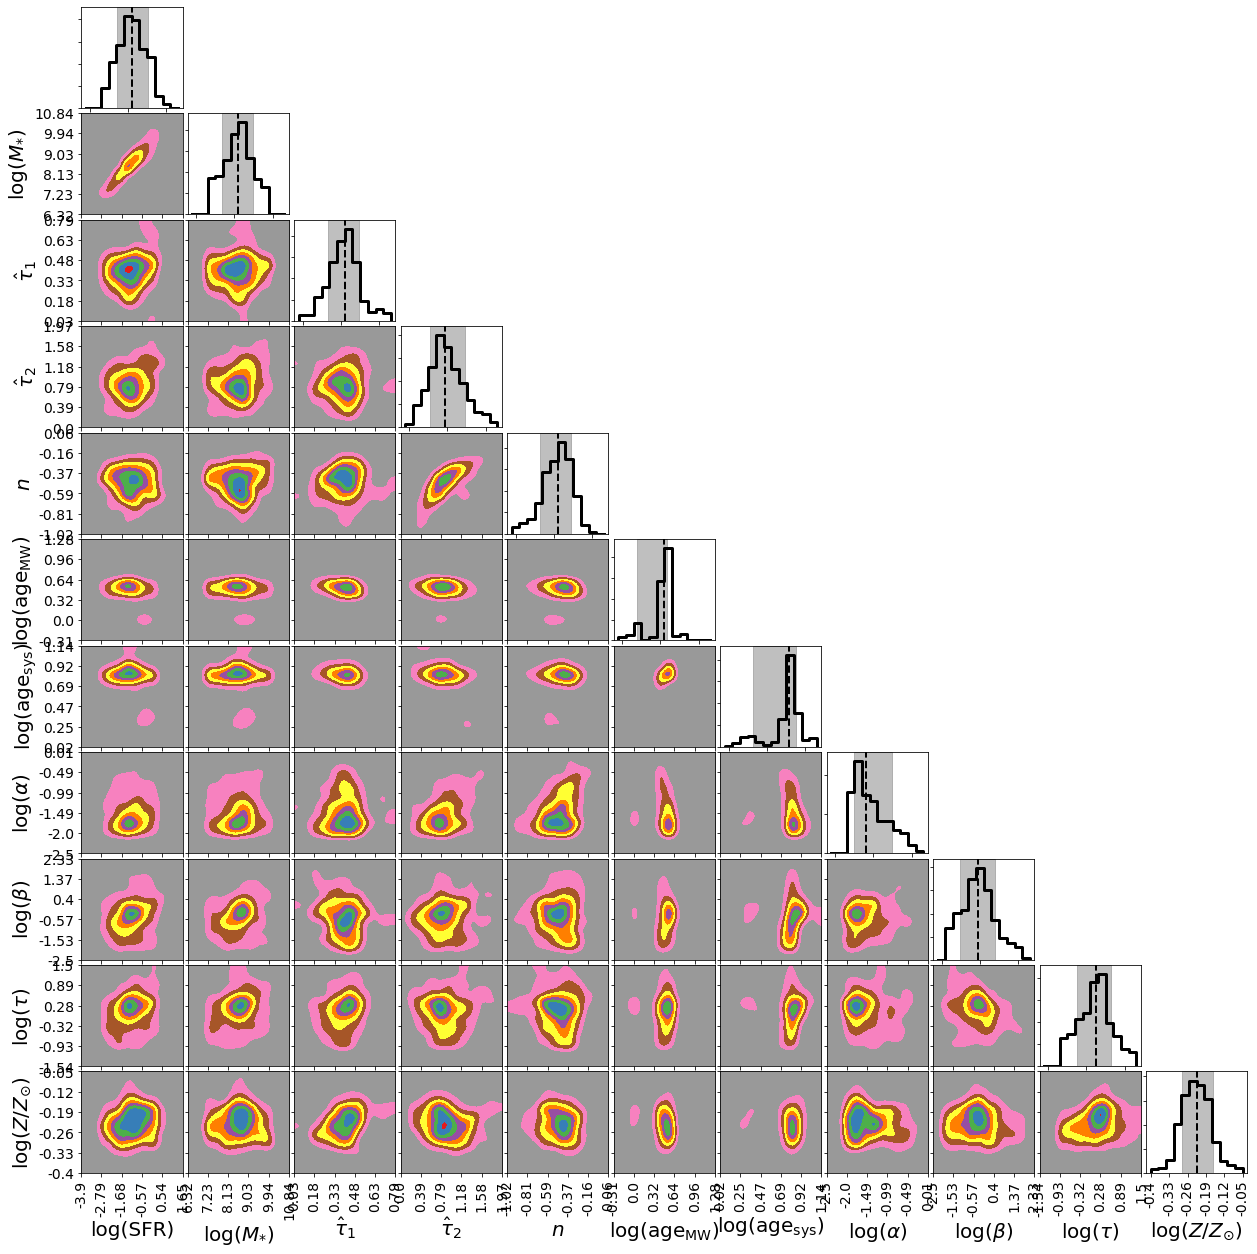

In [11]:
name_sampler_fits = "mcmc_bin43.fits"
plot_corner(name_sampler_fits)

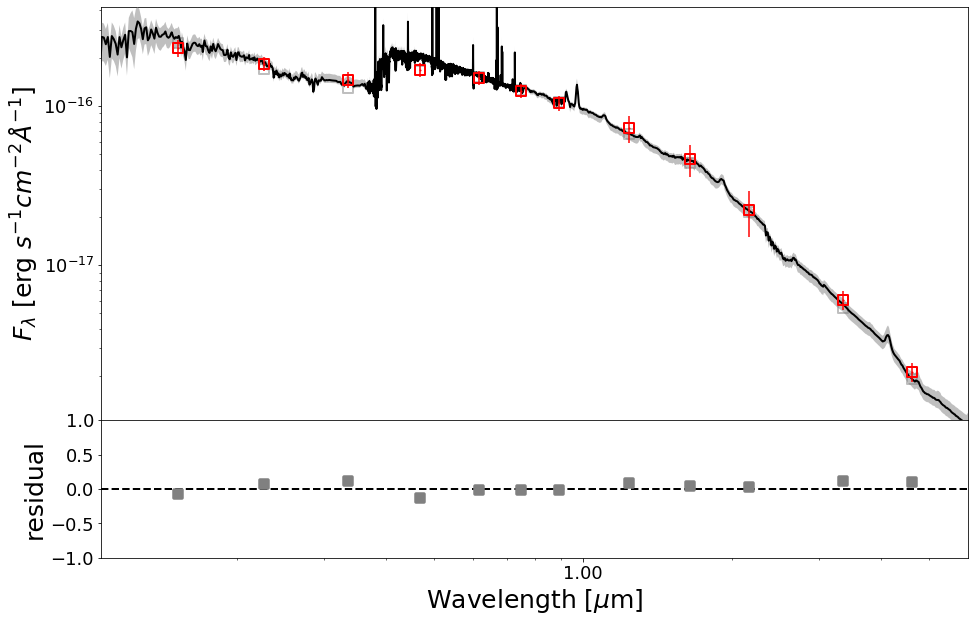

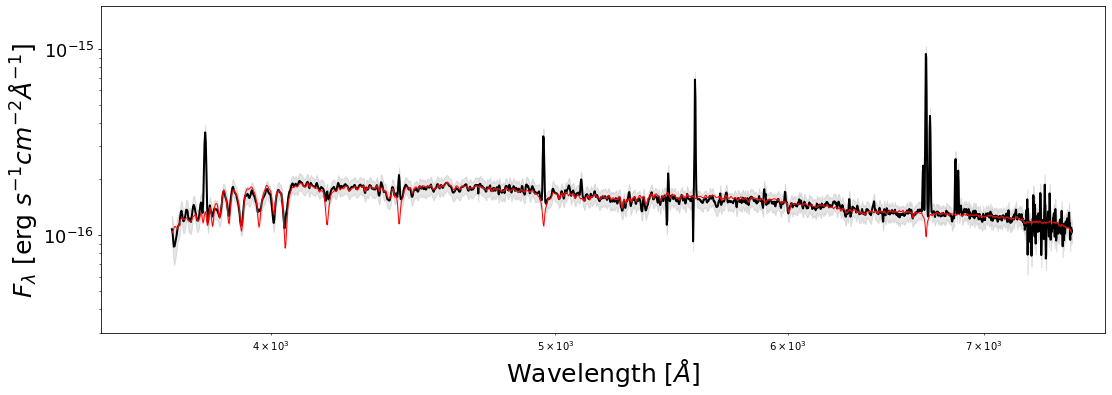

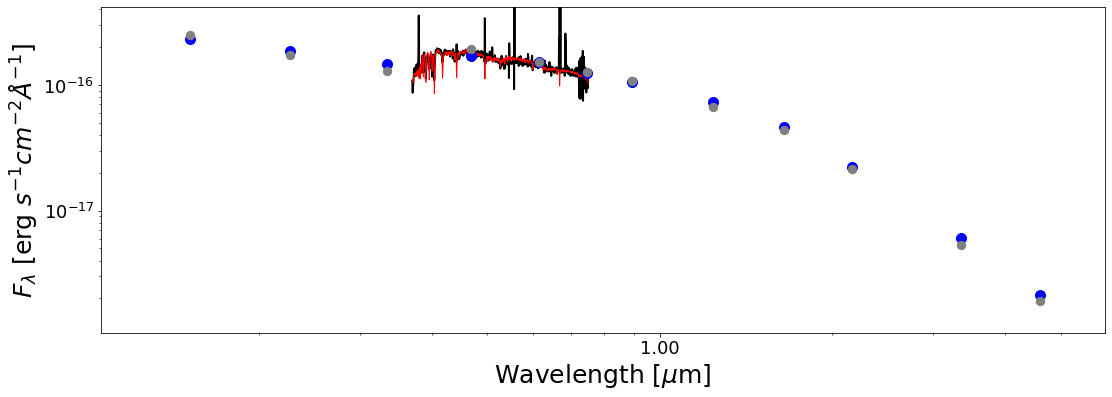

In [12]:
name_sampler_fits = "mcmc_bin43.fits"
plot_SED(name_sampler_fits, loc_legend=3, decompose=0)

### Spatial bin 67

Plotting posteriors probability distributions
=> Number of parameters: 11


'corner_mcmc_bin67.png'

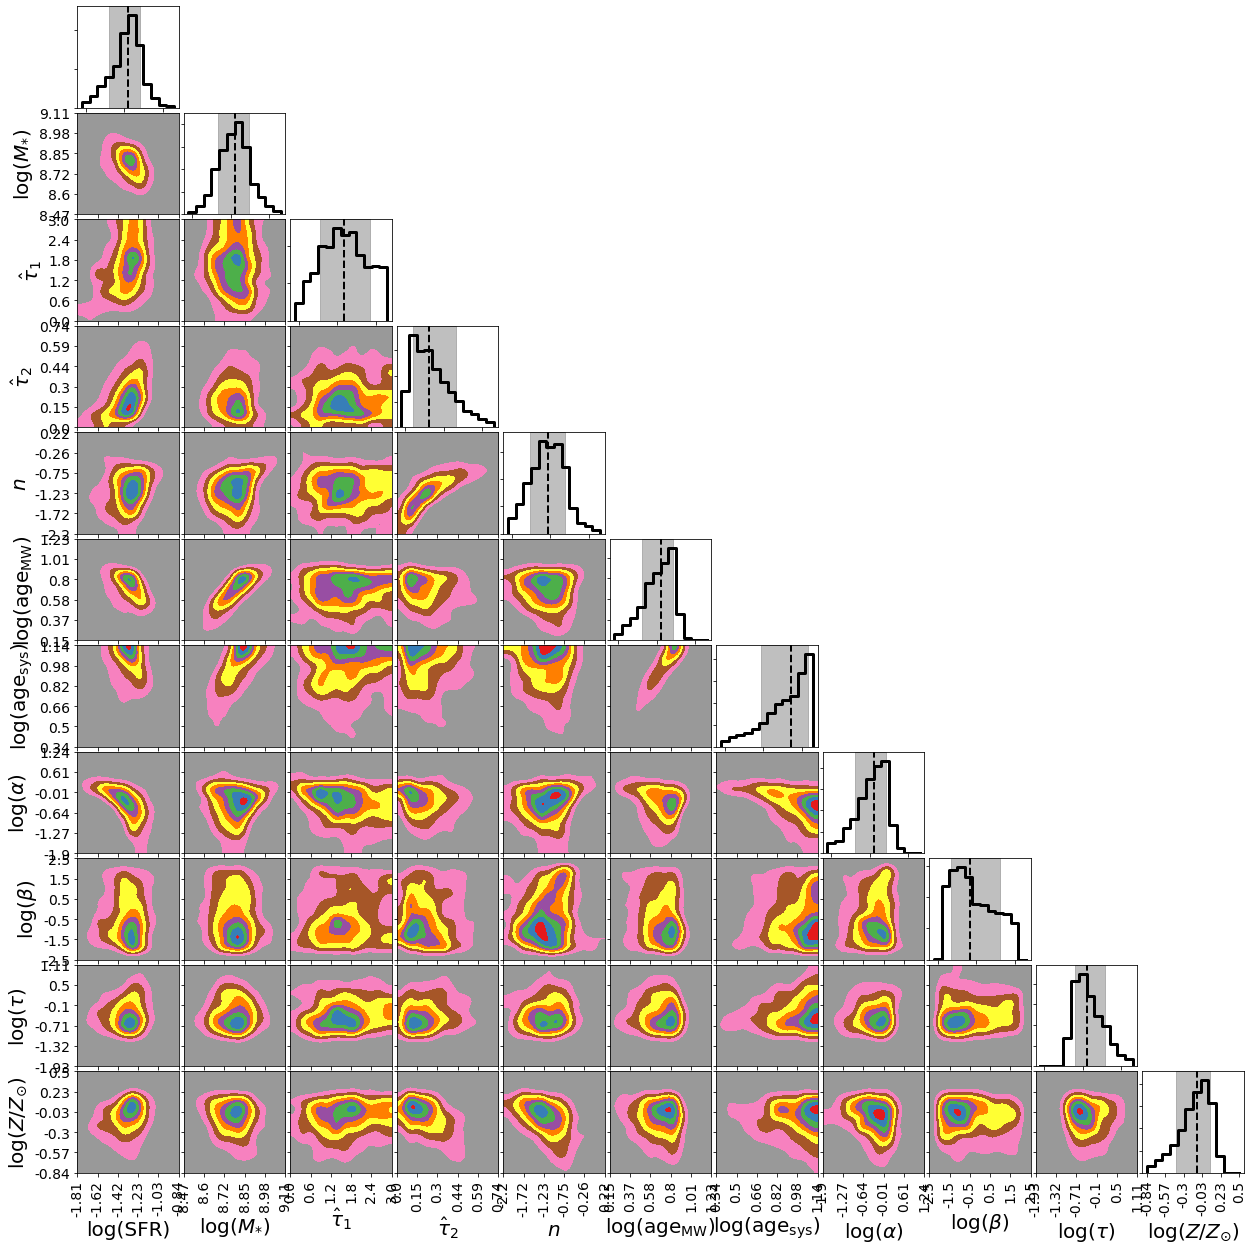

In [14]:
name_sampler_fits = "mcmc_bin67.fits"
plot_corner(name_sampler_fits)

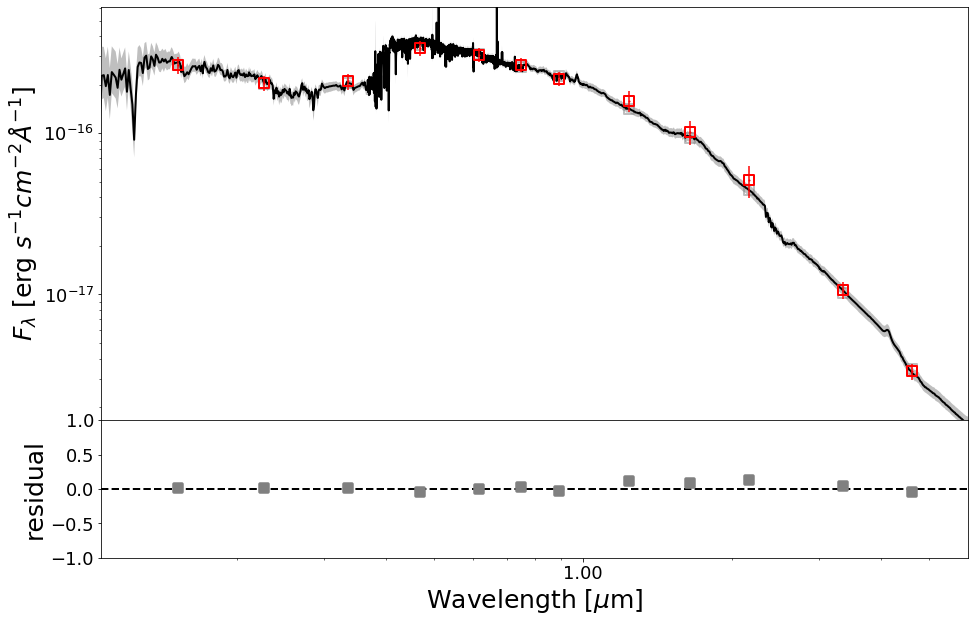

In [13]:
name_sampler_fits = "mcmc_bin67.fits"
plot_SED(name_sampler_fits, loc_legend=3, decompose=0)

### Spatial bin 145

Plotting posteriors probability distributions
=> Number of parameters: 11


'corner_mcmc_bin145.png'

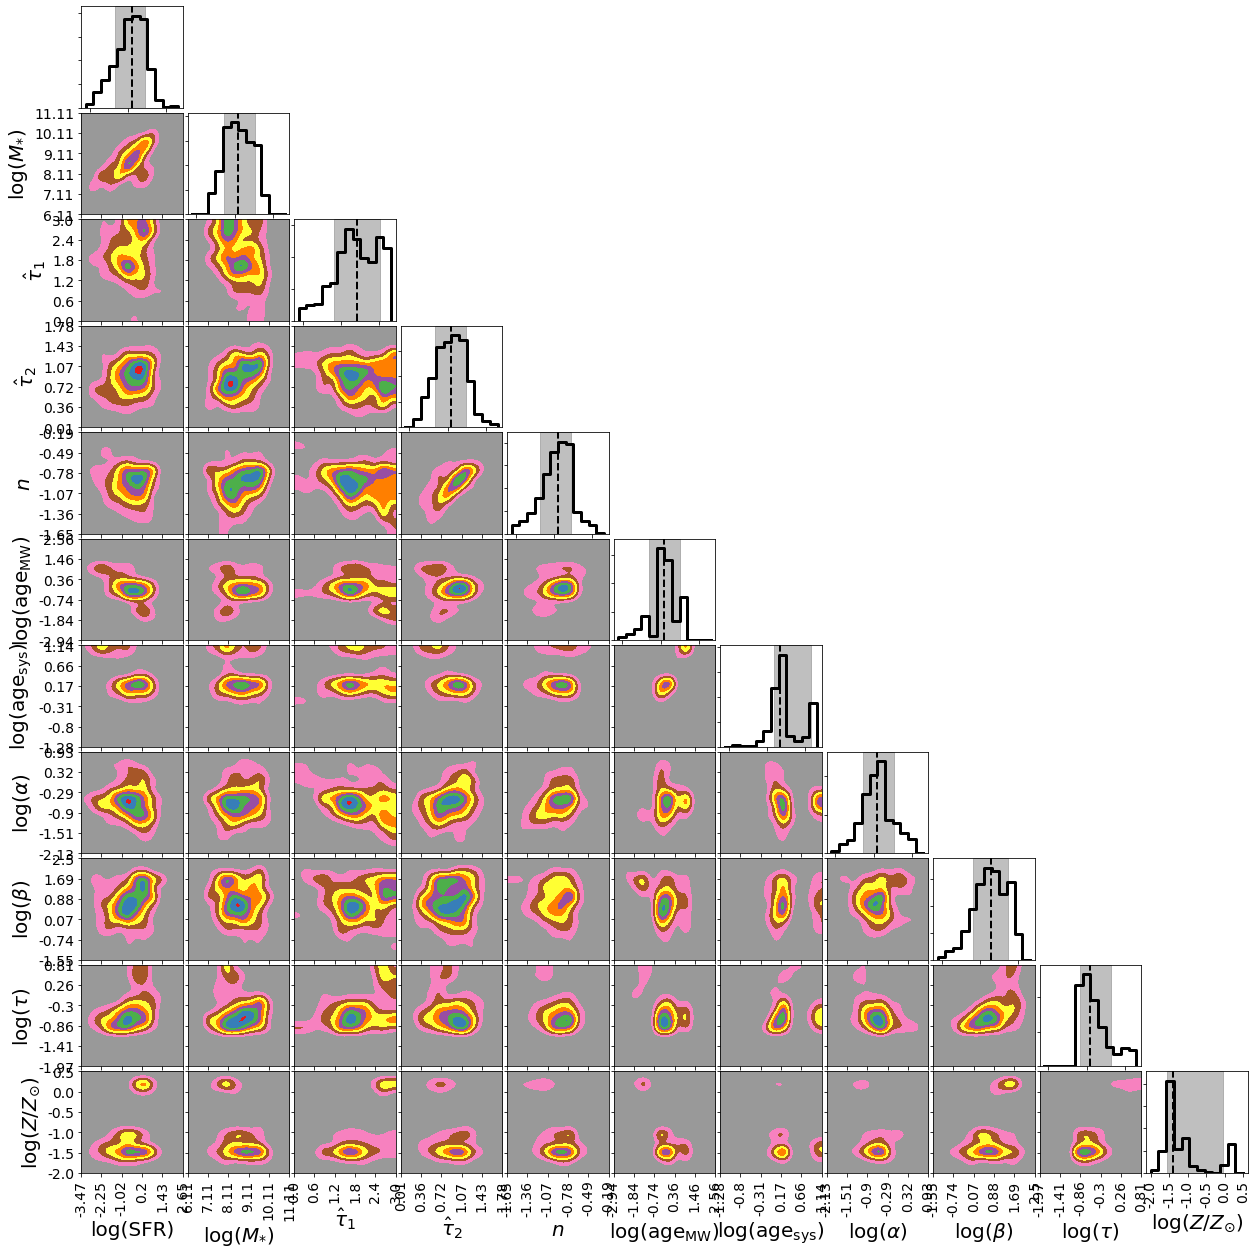

In [15]:
name_sampler_fits = "mcmc_bin145.fits"
plot_corner(name_sampler_fits)

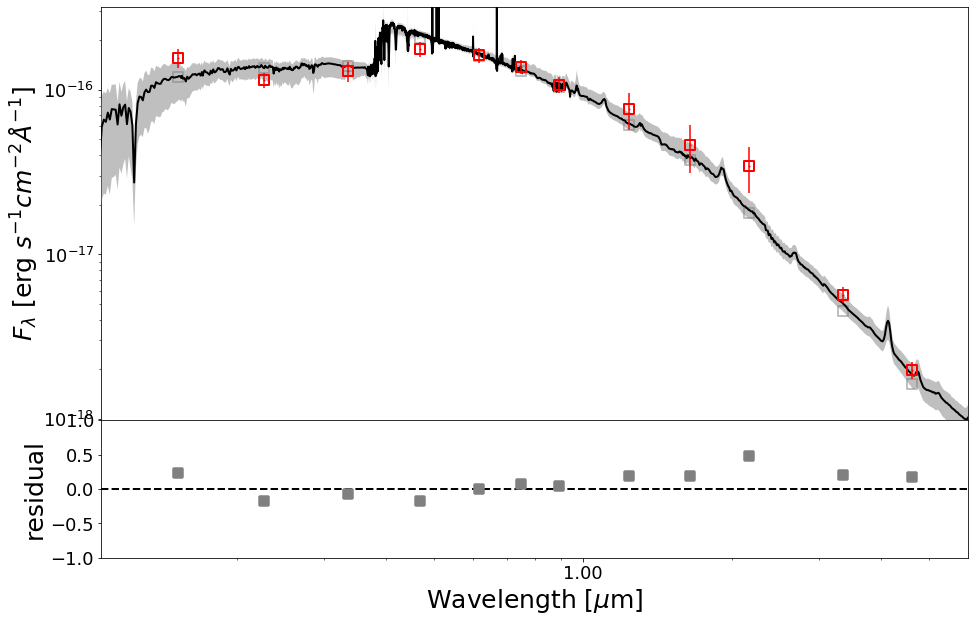

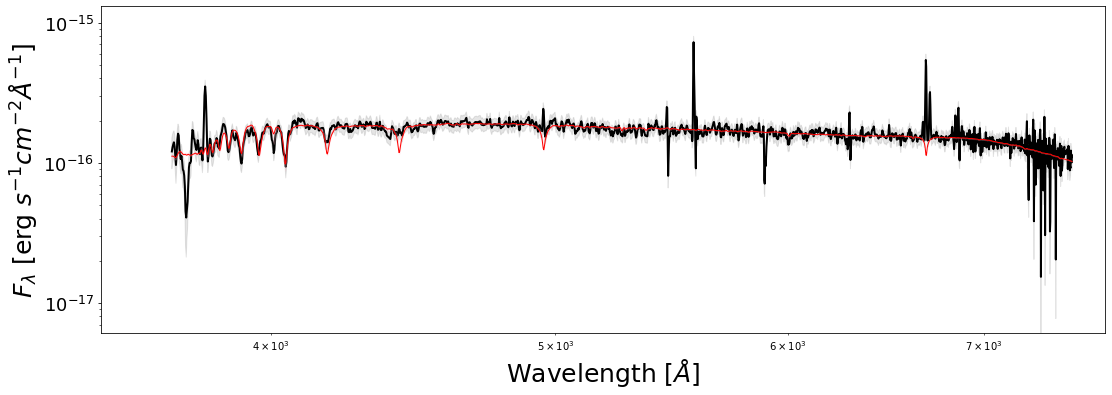

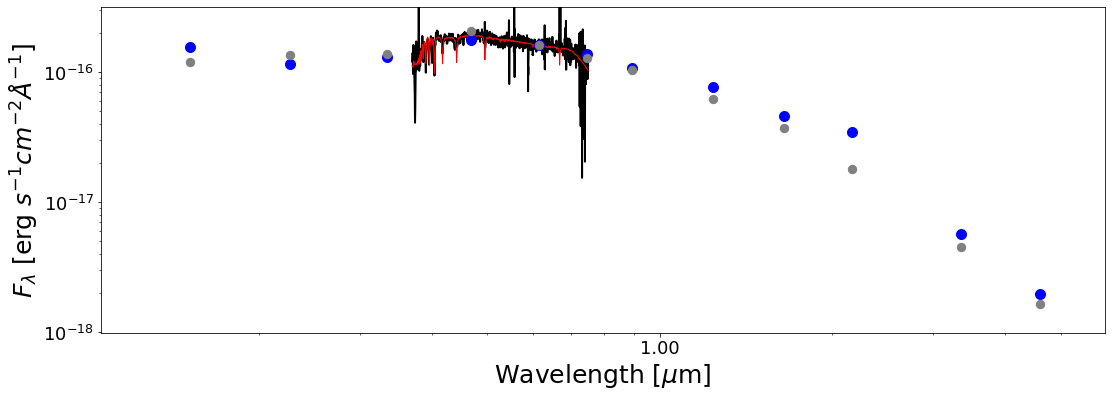

In [16]:
name_sampler_fits = "mcmc_bin145.fits"
plot_SED(name_sampler_fits, loc_legend=3, decompose=0)